In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# CSV files to import

MMR_totals = "Cleaned_Data/2009_2019_CDC_MMR.csv"
M_Deaths_race = "Resources_P3/Maternal_Deaths_race_2009-2019.csv"
M_race_births = "Resources_P3/Births_Maternal_race_2009-2019.csv"

In [51]:
# read csv files
MMR_totals = pd.read_csv(MMR_totals)
deaths_df = pd.read_csv(M_Deaths_race)
births_mat_race = pd.read_csv(M_race_births)

### Maternal Deaths by race 2009-2019 
#### Publicly available Underlying Cause of Death data produced by the National Center for Health Statistics (NCHS) and collected from the [CDC Wonder site](https://wonder.cdc.gov/ucd-icd10.html).

In [52]:
deaths_df.head()

,State,State Code,Year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,Unreliable
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,Unreliable
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,3.6
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,Unreliable
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,Unreliable


In [53]:
# change "Population" column to "Population by Race"
deaths_race_df = deaths_df.rename(columns={"State": "state",
                                           "State Code": "state_code",
                                           "Year": "year",
                                           "Population": "population_by_race",
                                           "Deaths": "deaths_by_race"})
deaths_race_df.head()

,state,state_code,year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,deaths_by_race,population_by_race,Crude Rate
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,Unreliable
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,Unreliable
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,3.6
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,Unreliable
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,Unreliable


### Natality data by race 2009-2019
#### Publicly available natality data produced by: 
#### United States Department of Health and Human Services (US DHHS), Centers for Disease Control and Prevention (CDC), National Center for Health Statistics (NCHS), Division of Vital Statistics (DVS), and collected from the [CDC Wonder Site](https://wonder.cdc.gov/natality-current.html)

In [54]:
# dataframe for births by maternal race
# change race column names to match for merging
# noting that for births the race is the maternal race
births_mat_race.head()
births_by_race = births_mat_race.rename(columns={"Births": "births_by_race", 
                                    "Mother's Bridged Race": "Race", 
                                    "Mother's Bridged Race Code": "Race Code", 
                                    "Mother's Hispanic Origin": "Hispanic Origin",
                                    "Mother's Hispanic Origin Code": "Hispanic Origin Code",
                                    "State": "state",
                                    "State Code": "state_code",
                                    "Year": "year"})
births_by_race.head()

,state,state_code,year,Race,Race Code,Hispanic Origin,Hispanic Origin Code,births_by_race
0,Alabama,1,2009,American Indian or Alaska Native,1002-5,Hispanic or Latino,2135-2,13
1,Alabama,1,2009,American Indian or Alaska Native,1002-5,Not Hispanic or Latino,2186-5,203
2,Alabama,1,2009,Asian or Pacific Islander,A-PI,Not Hispanic or Latino,2186-5,981
3,Alabama,1,2009,Black or African American,2054-5,Hispanic or Latino,2135-2,53
4,Alabama,1,2009,Black or African American,2054-5,Not Hispanic or Latino,2186-5,19230


#### Merge maternal death and natality data for 2009-2019

In [55]:
race_birth_death_df = deaths_race_df.merge(births_by_race, how="left", on=["state", "year", "Race", "Hispanic Origin"])
race_birth_death_df.head()

# clean up by selecting only the columns we need
race_birth_death_df_clean = race_birth_death_df[["state", "state_code_x", "year", "Race",\
                                                "Race Code_x", "Hispanic Origin",\
                                                "Hispanic Origin Code_x", "deaths_by_race",\
                                                "population_by_race", "births_by_race"]]
race_birth_death_df_clean.head()

# clean by renaming columns
race_b_d_df = race_birth_death_df_clean.rename(columns={"Race": "race", 
                                    "Race Code_x": "race_code", 
                                    "Hispanic Origin": "hispanic_origin",             
                                    "Hispanic Origin Code_x":"hispanic_origin_code",
                                    "state_code_x": "state_code"})
race_b_d_df

,state,state_code,year,race,race_code,hispanic_origin,hispanic_origin_code,deaths_by_race,population_by_race,births_by_race
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,17989
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,35319
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,18354
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,34784
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,17939
...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,White,2106-3,Not Hispanic or Latino,2186-2,10,853052,16785
384,Wisconsin,55,2009,White,2106-3,Not Hispanic or Latino,2186-2,10,0,52462
385,Wisconsin,55,2011,White,2106-3,Not Hispanic or Latino,2186-2,10,0,50500
386,Wisconsin,55,2014,White,2106-3,Not Hispanic or Latino,2186-2,13,2409803,49440


#### Bring in previously calculated MMR data from Project 2, with totals per state, per year, not stratified by race

In [56]:
MMR_totals.head()

,state,state_code,year,deaths,births,maternal_mortality_ratio,population
0,Alabama,1,2015,12,59657,20.11,2505795
1,Alabama,1,2016,35,59151,59.17,2507714
2,Alabama,1,2017,41,58941,69.56,2514911
3,Alabama,1,2018,31,57761,53.67,2523756
4,Alabama,1,2019,35,58615,59.71,2533668


In [57]:
# rename columns to clarify these are the total figures
MMR_totals_us = MMR_totals.rename(columns={"population": "total_population",
                                           "maternal_mortality_ratio": "total_mmr",
                                           "deaths": "total_deaths", 
                                           "births": "total_births"})
MMR_totals_us

,state,state_code,year,total_deaths,total_births,total_mmr,total_population
0,Alabama,1,2015,12,59657,20.11,2505795
1,Alabama,1,2016,35,59151,59.17,2507714
2,Alabama,1,2017,41,58941,69.56,2514911
3,Alabama,1,2018,31,57761,53.67,2523756
4,Alabama,1,2019,35,58615,59.71,2533668
...,...,...,...,...,...,...,...
303,Wisconsin,55,2014,16,67161,23.82,2898057
304,Wisconsin,55,2015,11,67041,16.41,2903737
305,Wisconsin,55,2016,15,66615,22.52,2905282
306,Wisconsin,55,2017,12,64975,18.47,2912745


#### Merge total MMR data with births and death data by maternal race

In [58]:
CDC_MMR_race_total = race_b_d_df.merge(MMR_totals_us, how="left", on=["state", "year"])
CDC_MMR_race_total.head()

,state,state_code_x,year,race,race_code,hispanic_origin,hispanic_origin_code,deaths_by_race,population_by_race,births_by_race,state_code_y,total_deaths,total_births,total_mmr,total_population
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,0,17989,1,35,59151,59.17,2507714
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,18,0,35319,1,35,59151,59.17,2507714
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,25,704201,18354,1,41,58941,69.56,2514911
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,15,1655605,34784,1,41,58941,69.56,2514911
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,14,706754,17939,1,31,57761,53.67,2523756


In [59]:
# clean up by selecting only the columns we need
CDC_MMR_race_total_clean = CDC_MMR_race_total[["state", "state_code_x", "year", "race",\
                                                "race_code", "hispanic_origin",\
                                                "hispanic_origin_code","total_births",\
                                                "births_by_race", "total_deaths",\
                                                "deaths_by_race", "total_mmr",\
                                                "total_population","population_by_race"]]
CDC_MMR_race_total_clean.head()

# rename column
MMR_race_df = CDC_MMR_race_total_clean.rename(columns={"state_code_x": "state_code"})
MMR_race_df.head()

,state,state_code,year,race,race_code,hispanic_origin,hispanic_origin_code,total_births,births_by_race,total_deaths,deaths_by_race,total_mmr,total_population,population_by_race
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,59151,17989,35,14,59.17,2507714,0
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,59151,35319,35,18,59.17,2507714,0
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,58941,18354,41,25,69.56,2514911,704201
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,58941,34784,41,15,69.56,2514911,1655605
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,57761,17939,31,14,53.67,2523756,706754


#### Calculate MMR by race: maternal deaths / births for the same period x 100,000. The birth data uses the maternal race. 

In [60]:
# maternal deaths / births for same period * 100000
ratio_straight = round((MMR_race_df["deaths_by_race"] / MMR_race_df["births_by_race"]) * 100000, 2)
ratio_straight

0       77.83
1       50.96
2      136.21
3       43.12
4       78.04
        ...  
383     59.58
384     19.06
385     19.80
386     26.29
387     20.40
Length: 388, dtype: float64

In [61]:
# add ratio as a column to our df

MMR_race_df["mmr_by_race"] = ratio_straight
MMR_race_df.head()

# reorder columns

MMR_race_final_df = MMR_race_df[["state", "state_code", "year", "race",\
                                                "race_code", "hispanic_origin",\
                                                "hispanic_origin_code","total_births",\
                                                "births_by_race", "total_deaths",\
                                                "deaths_by_race", "total_mmr", "mmr_by_race",\
                                                "total_population","population_by_race"]]
MMR_race_final_df.head()

,state,state_code,year,race,race_code,hispanic_origin,hispanic_origin_code,total_births,births_by_race,total_deaths,deaths_by_race,total_mmr,mmr_by_race,total_population,population_by_race
0,Alabama,1,2016,Black or African American,2054-5,Not Hispanic or Latino,2186-2,59151,17989,35,14,59.17,77.83,2507714,0
1,Alabama,1,2016,White,2106-3,Not Hispanic or Latino,2186-2,59151,35319,35,18,59.17,50.96,2507714,0
2,Alabama,1,2017,Black or African American,2054-5,Not Hispanic or Latino,2186-2,58941,18354,41,25,69.56,136.21,2514911,704201
3,Alabama,1,2017,White,2106-3,Not Hispanic or Latino,2186-2,58941,34784,41,15,69.56,43.12,2514911,1655605
4,Alabama,1,2018,Black or African American,2054-5,Not Hispanic or Latino,2186-2,57761,17939,31,14,53.67,78.04,2523756,706754


In [62]:
# check datatypes
MMR_race_final_df.dtypes

state                    object
state_code                int64
year                      int64
race                     object
race_code                object
hispanic_origin          object
hispanic_origin_code     object
total_births              int64
births_by_race            int64
total_deaths              int64
deaths_by_race            int64
total_mmr               float64
mmr_by_race             float64
total_population          int64
population_by_race        int64
dtype: object

#### Exploratory Data Analysis: MMR by race for years 2009-2019

In [63]:
# viewing MMR by race
group_by = MMR_race_final_df.groupby(["race", "hispanic_origin"]).agg({"mmr_by_race":["mean", "median", "max", "min"]})
group_by

mmr_by_race                  \
                                                        mean  median     max   
race                      hispanic_origin                                      
Asian or Pacific Islander Not Hispanic or Latino   17.036667  17.470   20.46   
Black or African American Not Hispanic or Latino   72.913475  66.760  192.68   
White                     Hispanic or Latino       23.804737  23.005   46.58   
                          Not Hispanic or Latino   30.015813  27.180   78.20   

                                                         
                                                    min  
race                      hispanic_origin                
Asian or Pacific Islander Not Hispanic or Latino  13.75  
Black or African American Not Hispanic or Latino  32.14  
White                     Hispanic or Latino       8.55  
                          Not Hispanic or Latino  12.33

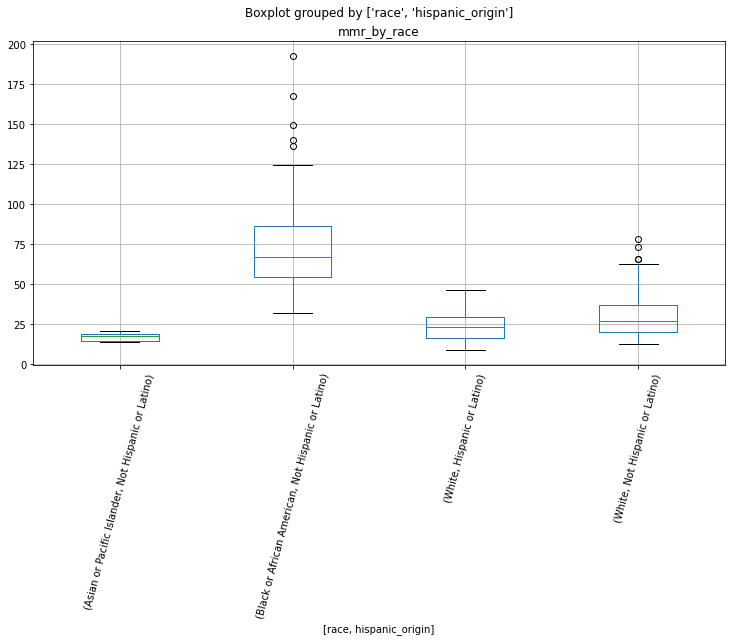

In [64]:
# boxplot for MMR by race
boxplot_mmr = MMR_race_final_df.boxplot(column=["mmr_by_race"], by=["race", "hispanic_origin"], rot=75, figsize=(12,6))

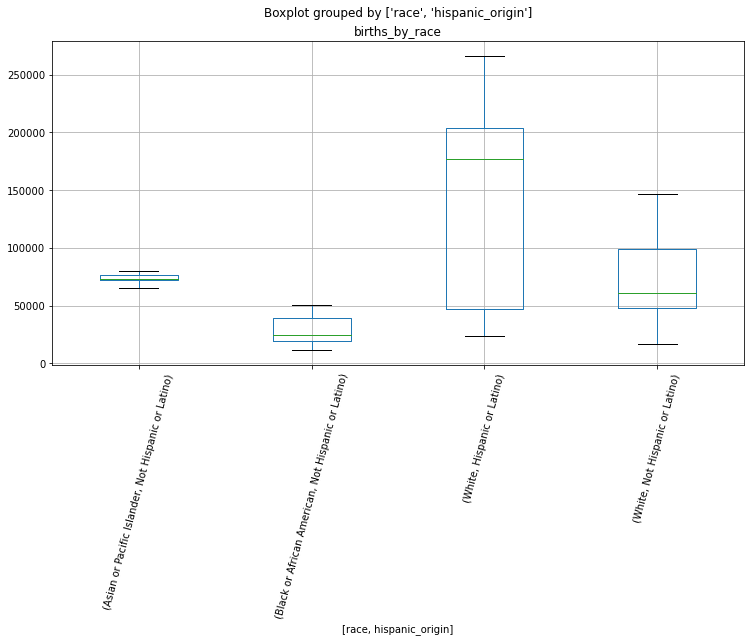

In [65]:
# boxplot for births by race
boxplot_births = MMR_race_final_df.boxplot(column=["births_by_race"], by=["race", "hispanic_origin"], rot=75, figsize=(12,6))
boxplot_births

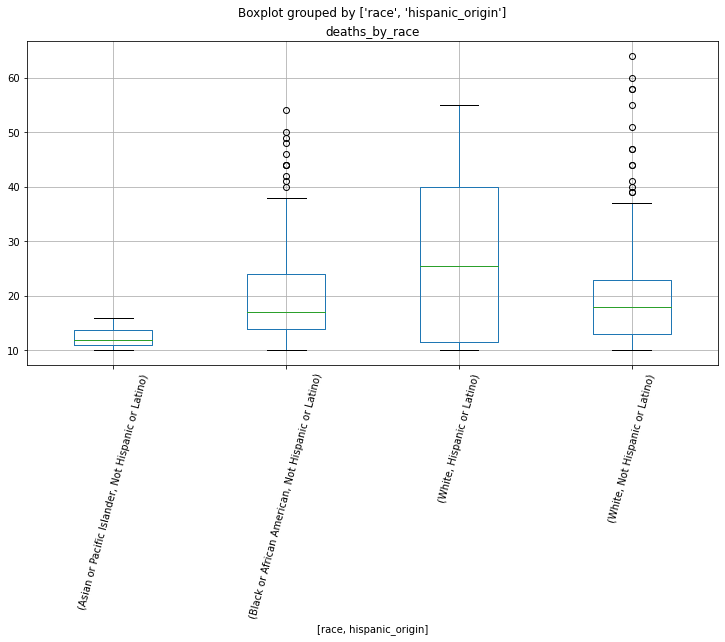

In [66]:
# boxplot for maternal deaths by race
boxplot_m_deaths = MMR_race_final_df.boxplot(column=["deaths_by_race"], by=["race", "hispanic_origin"], rot=75, figsize=(12,6))

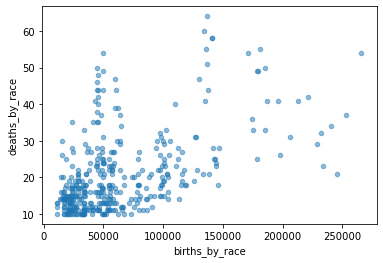

In [77]:
# comparing births and deaths by race
MMR_race_final_df.plot.scatter(x="births_by_race", y="deaths_by_race", alpha=0.5)

In [103]:
# run correlation
MMR_race_final_df.corr()

,state_code,year,total_births,births_by_race,total_deaths,deaths_by_race,total_mmr,mmr_by_race,total_population,population_by_race
state_code,1.000000,-0.003414,-0.200229,-0.064594,0.026575,0.076853,0.002985,0.060864,-0.249864,0.030284
year,-0.003414,1.000000,-0.119619,-0.110851,-0.086712,-0.078901,0.144595,0.051548,-0.059042,0.362474
total_births,-0.200229,-0.119619,1.000000,0.630711,0.788065,0.463293,-0.459144,-0.223353,0.986360,0.253773
births_by_race,-0.064594,-0.110851,0.630711,1.000000,0.516851,0.526657,-0.331363,-0.562631,0.612429,0.431093
total_deaths,0.026575,-0.086712,0.788065,0.516851,1.000000,0.794033,0.019396,0.049517,0.733430,0.196693
deaths_by_race,0.076853,-0.078901,0.463293,0.526657,0.794033,1.000000,0.237101,0.175630,0.402399,0.172267
total_mmr,0.002985,0.144595,-0.459144,-0.331363,0.019396,0.237101,1.000000,0.538505,-0.501266,-0.161596
mmr_by_race,0.060864,0.051548,-0.223353,-0.562631,0.049517,0.175630,0.538505,1.000000,-0.246148,-0.360120
total_population,-0.249864,-0.059042,0.986360,0.612429,0.733430,0.402399,-0.501266,-0.246148,1.000000,0.291567
population_by_race,0.030284,0.362474,0.253773,0.431093,0.196693,0.172267,-0.161596,-0.360120,0.291567,1.000000


#### Export Final DataFrame to CSV

In [104]:
# export file as a CSV, without the Pandas Index, but with the header
MMR_race_final_df.to_csv("Cleaned_Data/MMR_by_race_ML.csv", index=False, header=True, float_format='%.2f')